In [1]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

In [2]:
path = os.getcwd()
print(path)

c:\Users\MSI-NB\Anaconda\PPG\PPG_Initially_Proof


In [5]:
f = r'.\segmented_data\S1\irregular\Driving.pkl'

with open(f, 'rb') as fh:
    driving = pickle.load(fh, encoding='latin1')

print(type(driving))
print(len(driving))
print(driving[:1])  # Preview the first element


<class 'list'>
444
[{'bvp': array([[ 1.5678e+02],
       [ 1.5618e+02],
       [ 1.5359e+02],
       [ 1.4959e+02],
       [ 1.4470e+02],
       [ 1.3919e+02],
       [ 1.3303e+02],
       [ 1.2599e+02],
       [ 1.1789e+02],
       [ 1.0871e+02],
       [ 9.8750e+01],
       [ 8.8440e+01],
       [ 7.8210e+01],
       [ 6.8200e+01],
       [ 5.8190e+01],
       [ 4.7680e+01],
       [ 3.6140e+01],
       [ 2.3440e+01],
       [ 1.0030e+01],
       [-2.9700e+00],
       [-1.4260e+01],
       [-2.2820e+01],
       [-2.8420e+01],
       [-3.1830e+01],
       [-3.4690e+01],
       [-3.8950e+01],
       [-4.6220e+01],
       [-5.7170e+01],
       [-7.1080e+01],
       [-8.5730e+01],
       [-9.7710e+01],
       [-1.0309e+02],
       [-9.8650e+01],
       [-8.2970e+01],
       [-5.7240e+01],
       [-2.5120e+01],
       [ 8.0500e+00],
       [ 3.6900e+01],
       [ 5.7450e+01],
       [ 6.7880e+01],
       [ 6.8600e+01],
       [ 6.1370e+01],
       [ 4.8280e+01],
       [ 3.0850e+01],
    

In [31]:
f = r'.\dalias\S1.pkl'
with open(f, 'rb') as fh:
    S1 = pickle.load(fh, encoding='latin1')

for key, val in S1.items():
    arr = np.asarray(val)
    print(f"{key} - shape: {arr.shape}")

rpeaks - shape: (11431,)
signal - shape: ()
label - shape: (4603,)
activity - shape: (36848, 1)
questionnaire - shape: ()
subject - shape: ()


In [26]:
print("Signal nested structure:")
signal = S1['label']
print(signal[:10])

Signal nested structure:
[49.61136908 50.32399248 52.70833578 55.64079409 57.65840574 58.91155042
 57.97645889 58.6762924  62.35079952 69.11397505]


In [ ]:
# 1. signal
print("Signal nested structure:")
signal = S1['signal']
for device, data in signal.items():
    print(f"  {device}:")
    for sensor, values in data.items():
        print(f"    {sensor} - shape: {np.asarray(values).shape}")

Signal nested structure:
  chest:
    ACC - shape: (6448400, 3)
    ECG - shape: (6448400, 1)
    EMG - shape: (6448400, 1)
    EDA - shape: (6448400, 1)
    Temp - shape: (6448400, 1)
    Resp - shape: (6448400, 1)
  wrist:
    ACC - shape: (294784, 3)
    BVP - shape: (589568, 1)
    EDA - shape: (36848, 1)
    TEMP - shape: (36848, 1)


In [22]:
# 2. activity
print("\nFirst 10 activity labels:")
print(S1['activity'][:10])


First 10 activity labels:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
# 3. questionnaire 
print("\nQuestionnaire:")
for key, val in S1['questionnaire'].items():
    print(f"  {key}: {val}")


Questionnaire:
  WEIGHT: 78.0
  Gender:  m
  AGE: 34
  HEIGHT: 182.0
  SKIN: 3
  SPORT: 6


In [ ]:
# 4. subject
print("\nSubject:")
print(S1['subject'])


Subject:
S1


## Signal Nested Structure

### Chest
- **ACC**: shape `(6448400, 3)`
- **ECG**: shape `(6448400, 1)`
- **EMG**: shape `(6448400, 1)`
- **EDA**: shape `(6448400, 1)`
- **Temp**: shape `(6448400, 1)`
- **Resp**: shape `(6448400, 1)`

### Wrist
- **ACC**: shape `(294784, 3)`
- **BVP**: shape `(589568, 1)`
- **EDA**: shape `(36848, 1)`
- **TEMP**: shape `(36848, 1)`

In [ ]:
signals_to_check = {
    'ECG (chest)': S1['signal']['chest']['ECG']
}
for name, data in signals_to_check.items():
    arr = np.asarray(data)
    print(f"\n{name}:")
    print(f"  Shape: {arr.shape}")
    print(f"  Min:   {arr.min():.5f}")
    print(f"  Max:   {arr.max():.5f}")
    print(f"  Mean:  {arr.mean():.5f}")
    print(f"  First 5 values:\n{arr[:5]}")


ECG (chest):
  Shape: (6448400, 1)
  Min:   -1.49991
  Max:   1.49995
  Mean:  0.00071
  First 5 values:
[[0.01560974]
 [0.01812744]
 [0.01753235]
 [0.01341248]
 [0.01194763]]


In [20]:
signals_to_check = {
    'BVP (wrist)': S1['signal']['wrist']['BVP']
}
for name, data in signals_to_check.items():
    arr = np.asarray(data)
    print(f"\n{name}:")
    print(f"  Shape: {arr.shape}")
    print(f"  Min:   {arr.min():.5f}")
    print(f"  Max:   {arr.max():.5f}")
    print(f"  Mean:  {arr.mean():.5f}")
    print(f"  First 5 values:\n{arr[:5]}")


BVP (wrist):
  Shape: (589568, 1)
  Min:   -1647.39000
  Max:   1557.58000
  Mean:  -0.00231
  First 5 values:
[[7.28]
 [6.33]
 [5.46]
 [4.6 ]
 [3.74]]


In [21]:
signals_to_check = {
    'ACC (chest)': S1['signal']['chest']['ACC']
}
for name, data in signals_to_check.items():
    arr = np.asarray(data)
    print(f"\n{name}:")
    print(f"  Shape: {arr.shape}")
    print(f"  Min:   {arr.min():.5f}")
    print(f"  Max:   {arr.max():.5f}")
    print(f"  Mean:  {arr.mean():.5f}")
    print(f"  First 5 values:\n{arr[:5]}")


ACC (chest):
  Shape: (6448400, 3)
  Min:   -4.24900
  Max:   3.95120
  Mean:  0.13627
  First 5 values:
[[ 0.85640001 -0.06779999 -0.36559999]
 [ 0.8556     -0.06900001 -0.3646    ]
 [ 0.852      -0.07020003 -0.3642    ]
 [ 0.85259998 -0.06900001 -0.36400002]
 [ 0.85259998 -0.06980002 -0.36540002]]


In [19]:
signals_to_check = {
    'ACC (wrist)': S1['signal']['wrist']['ACC']
}
for name, data in signals_to_check.items():
    arr = np.asarray(data)
    print(f"\n{name}:")
    print(f"  Shape: {arr.shape}")
    print(f"  Min:   {arr.min():.5f}")
    print(f"  Max:   {arr.max():.5f}")
    print(f"  Mean:  {arr.mean():.5f}")
    print(f"  First 5 values:\n{arr[:5]}")


ACC (wrist):
  Shape: (294784, 3)
  Min:   -2.00000
  Max:   1.98438
  Mean:  0.05071
  First 5 values:
[[-0.765625 -0.078125  0.671875]
 [-0.765625 -0.078125  0.65625 ]
 [-0.765625 -0.078125  0.671875]
 [-0.765625 -0.078125  0.671875]
 [-0.75     -0.078125  0.671875]]


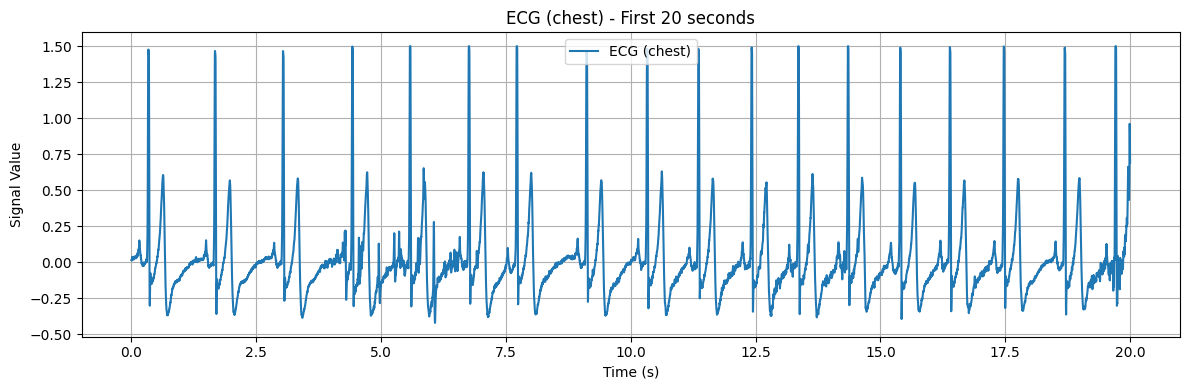

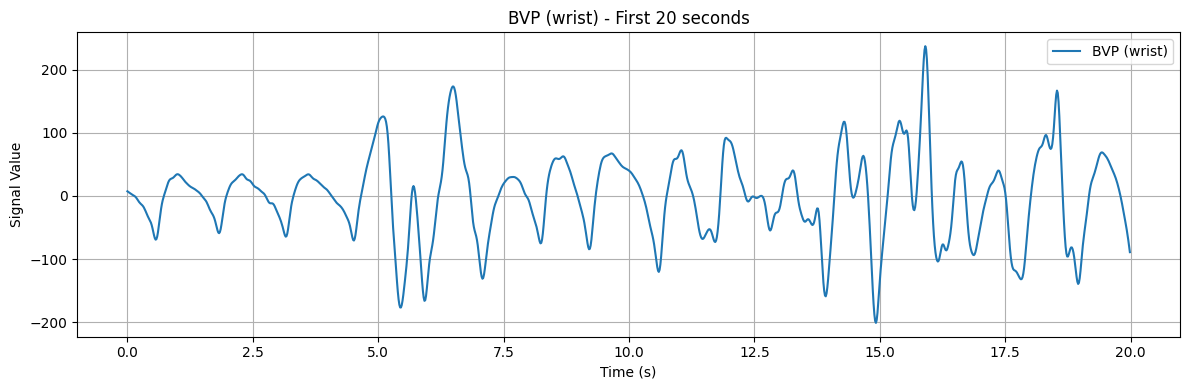

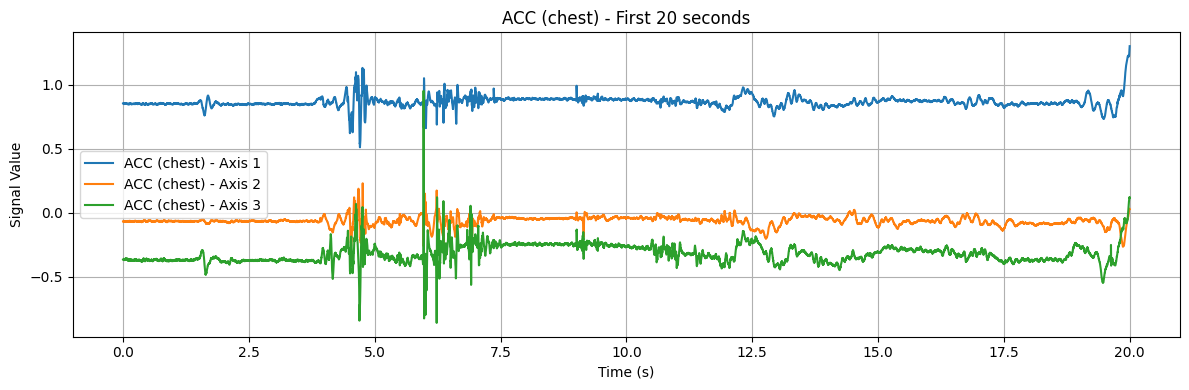

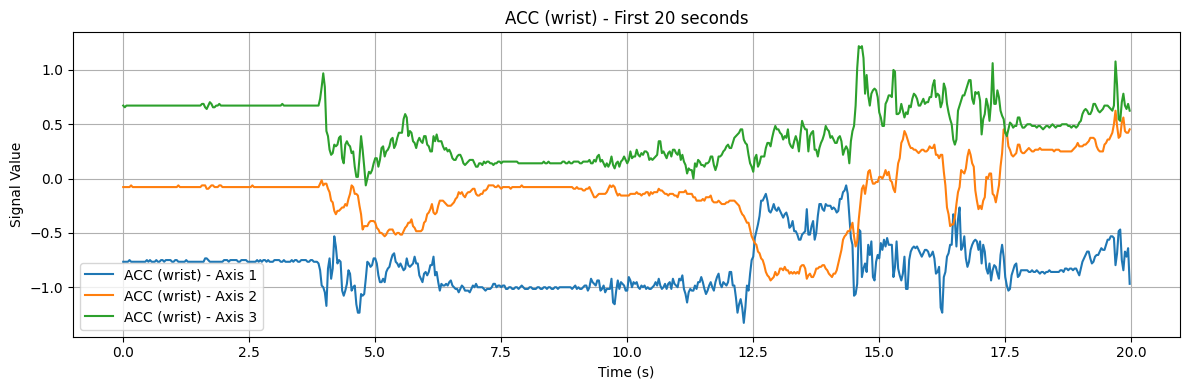

In [24]:
# sample frequency is from readme.md
signals_to_plot = {
    'ECG (chest)': {
        'data': S1['signal']['chest']['ECG'],
        'fs': 700
    },
    'BVP (wrist)': {
        'data': S1['signal']['wrist']['BVP'],
        'fs': 64
    },
    'ACC (chest)': {
        'data': S1['signal']['chest']['ACC'],
        'fs': 700
    },
    'ACC (wrist)': {
        'data': S1['signal']['wrist']['ACC'],
        'fs': 32
    },
}

for name, content in signals_to_plot.items():
    data = np.asarray(content['data'])
    fs = content['fs']
    duration = 20  # seconds
    n_samples = duration * fs
    time = np.arange(n_samples) / fs

    plt.figure(figsize=(12, 4))
    
    if data.shape[1] == 1:
        plt.plot(time, data[:n_samples], label=name)
    else:
        for i in range(data.shape[1]):
            plt.plot(time, data[:n_samples, i], label=f"{name} - Axis {i+1}")
    
    plt.title(f"{name} - First {duration} seconds")
    plt.xlabel("Time (s)")
    plt.ylabel("Signal Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Used Fields

| Field                    | Description                                  |
|--------------------------|----------------------------------------------|
| `signal['wrist']['BVP']` | PPG, 64 Hz                                   |
| `signal['wrist']['ACC']` | ACC, 32 Hz                                   |
| `label`                  | Ground truth, window size = 8s, step size = 2s |
| `activity`               | Activity label, 4 Hz                         |